0

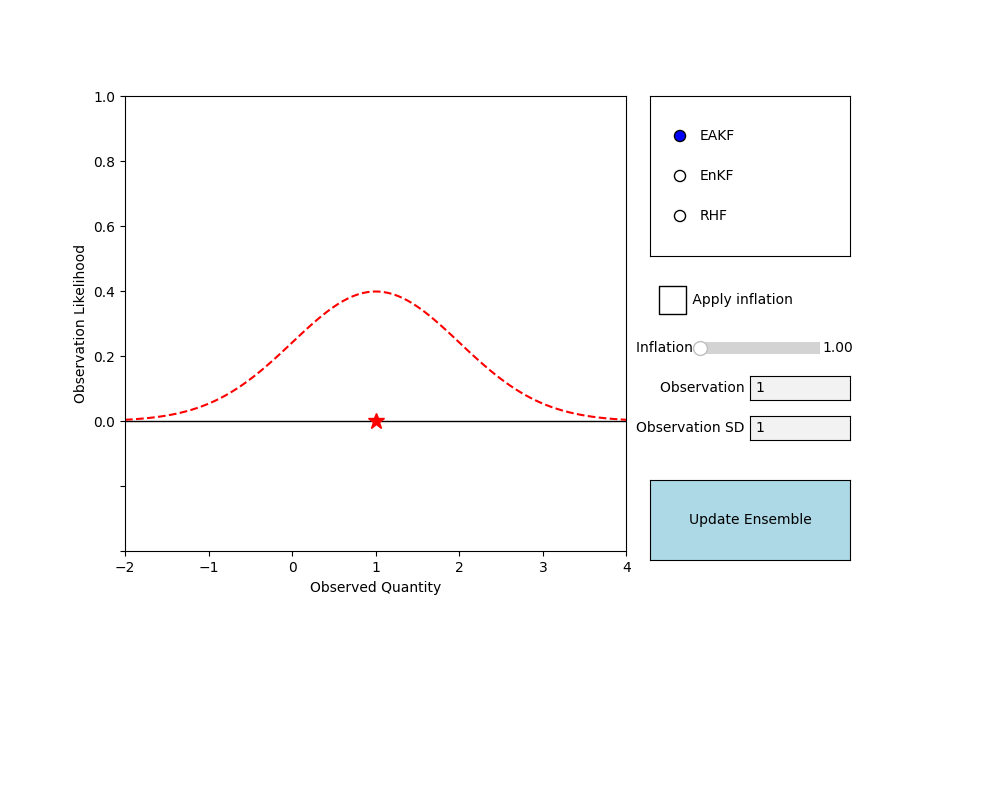

Clicked at x=0.07209316936056664
Clicked at x=1.316433345313646
Clicked at x=2.106110764668485
Clicked at x=2.0343219083634994
Clicked at x=0.5506855447271359
Clicked at x=-0.03559011509691157
Clicked at x=-0.9449156282933924
Clicked at x=-1.088493340903363


In [85]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.widgets import Button
from matplotlib.widgets import TextBox
from matplotlib.widgets import RadioButtons
from matplotlib.widgets import Slider
from matplotlib.widgets import CheckButtons

import numpy as np

from matplotlib.ticker import FuncFormatter
%matplotlib widget

# Create figure
fig = plt.figure(figsize=(10, 8))
fig.canvas.header_visible = False

# Define GridSpec
gs = gridspec.GridSpec(4, 3, figure=fig)

# Create subplots of varying sizes and shapes
ax1 = fig.add_subplot(gs[0:3, 0:2]) # clicky main plot
ax1.set_xlim(-2, 4)
ax1.set_ylim(-0.4, 1)
x_limits_ax1 = ax1.get_xlim()

# TODO: this function is common to twod_ensemble also
# Define a custom formatter function
def hide_negative_numbers(x, pos):
    """Hide negative numbers on an axis."""
    if x < 0:
        return ''
    return f'{x:.1f}'

# TODO: this function is common to twod_ensemble also
def plot_observation(ax, mu, sigma):
    # Define the normal distribution parameters
    #mu = 5  # mean
    #sigma = 1  # standard deviation

    # Generate x values
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

    # Compute y values for the normal distribution
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    ax.axhline(y=0, color='k', linestyle='-', linewidth=1)
    ax.set_xlim(x_limits_ax1)
    #ax.set_ylim(bottom=-0.1)  # this is also causing the top limit to be 1
    # Apply the custom formatter to the y-axis of ax3
    ax.yaxis.set_major_formatter(FuncFormatter(hide_negative_numbers))
    ax.plot(x,y, linestyle='--', color='r')
    ax.plot(mu, 0, 'r*', markersize=12)
    ax.set_xlabel('Observed Quantity')
    ax.set_ylabel('Observation Likelihood')

mu_intial = 1
sigma_initial = 1
plot_observation(ax1,1,1)


# Initialize an empty list to store the points
clicked_points = []

def on_click(event):
    # Check if the click was on ax1
    if event.inaxes == ax1:
        # Append the clicked point (xdata, ydata) to the list
        clicked_points.append((event.xdata))
        print(f"Clicked at x={event.xdata}")
        # Plot the click coordinates on ax1
        ax1.plot(event.xdata, 0, 'go') 

# Connect the event handler to the figure
fig.canvas.mpl_connect('button_press_event', on_click)

# Filter choice
radio_ax = plt.axes([0.65, 0.68, 0.2, 0.2])  # [left, bottom, width, height]

# Step 3: Create the RadioButtons widget
radio = RadioButtons(radio_ax, ('EAKF', 'EnKF', 'RHF'), radio_props={'s': [64, 64, 64]})
current_filter_selection = 'EAKF'

# Step 4: Define the event handler function
def handle_radio(label):
    global current_filter_selection 
    current_filter_selection = label
    if label == 'EAKF':
        # Handle Option 1
        print("EAKF selected")
    elif label == 'EnKF':
        # Handle Option 2
        print("EnKF selected")
    elif label == 'RHF':
        # Handle Option 3
        print("RHF selected")
    plt.draw()  # Update the plot if necessary

# Step 5: Connect the RadioButtons widget to the event handler
radio.on_clicked(handle_radio)

# Create a button axes
button_ax = plt.axes([0.65, 0.3, 0.2, 0.1])  # [left, bottom, width, height]
button = Button(button_ax, 'Update Ensemble', color='lightblue', hovercolor='0.975')


# Observeration text boxes
mu_textbox_ax = plt.axes([0.75, 0.5, 0.1, 0.03])
sigma_textbox_ax = plt.axes([0.75, 0.45, 0.1, 0.03])

mu_textbox = TextBox(mu_textbox_ax, 'Observation ', initial=str(mu_intial))
sigma_textbox = TextBox(sigma_textbox_ax, 'Observation SD ', initial=str(sigma_initial))

# inflation slider
inflation_slider_ax = plt.axes([0.70, 0.55, 0.12, 0.03], facecolor='lightgoldenrodyellow')
inflation_slider = Slider(ax=inflation_slider_ax, label='Inflation ', valmin=1.0, valmax=5.0, valinit=1.0, valfmt='%1.2f')

# Step 4: Define the update function
def update_inflation(val):
    inflation_factor = inflation_slider.val
    # Here you would typically apply the inflation factor to your model or data
    print(f"Inflation Factor: {inflation_factor}")  # Example action

# Step 5: Connect the slider to the update function
inflation_slider.on_changed(update_inflation)

# Toggle inflation on or off
check_ax = plt.axes([0.65, 0.60, 0.15, 0.05])  # Adjust these coordinates as needed
for spine in check_ax.spines.values():
    spine.set_visible(False)
check_button = CheckButtons(check_ax, [' Apply inflation'], [False], check_props={'s': [400]}, frame_props={'s': [400]})

# Step 4: Define the callback function
def toggle_inflation(label):
    if label == 'Apply inflation':
        # Here, implement what happens when inflation is toggled
        # For example, adjust a parameter or update the plot
        # This is a placeholder for the actual logic
        inflation_enabled = check_button.get_status()[0]
        print(f"Inflation enabled: {inflation_enabled}")
        # Update your plot or parameters here based on the inflation_enabled state

# Step 5: Link the callback function to the CheckButtons widget
check_button.on_clicked(toggle_inflation)

